**Plataformas de visualización - DS_C3_SC2_T5**

---


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

1. Lee en un dataframe `woman_parl`, el contenido del archivo WomanParliaments.csv, que almacena, por país, el porcentaje de escaños parlamentarios ocupados por mujeres desde 1997.

In [3]:
woman_parl = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TLG/DS_C3_SC2_T5_Pruebate/WomanParliaments.csv")
woman_parl

,Country Name,Country Code,1997,1998,1999,...,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,...,27.710843,27.710843,NaN,27.868852,27.016129
2,Angola,AGO,9.545455,15.454545,15.454545,...,36.818182,30.454545,30.454545,30.000000,30.000000
3,Albania,ALB,NaN,NaN,5.161290,...,22.857143,27.857143,27.857143,29.508197,29.508197
...,...,...,...,...,...,...,...,...,...,...,...
260,"Yemen, Rep.",YEM,NaN,0.664452,0.664452,...,0.000000,0.000000,0.000000,0.332226,0.332226
261,South Africa,ZAF,25.000000,28.750000,30.000000,...,42.000000,41.836735,42.748092,46.347607,46.750000
262,Zambia,ZMB,9.677419,10.256410,10.126582,...,17.964072,17.964072,17.964072,17.964072,16.766467
263,Zimbabwe,ZWE,14.666667,14.666667,14.000000,...,31.481481,32.575758,31.481481,31.851852,31.851852


2.	A partir del dataframe anterior obtén uno (`mexico`) donde sólo almacenes la información de Mexico. Haz los cambios necesarios para que quede con la siguiente estructura.

In [4]:
mexico = woman_parl[woman_parl['Country Code']=='MEX']
mexico = mexico.drop(['Country Code'],axis=1)
mexico.set_index('Country Name',inplace=True)
mexico.index.name=''
mexico = mexico.T
mexico

,Mexico
1997,14.2
1998,17.4
1999,18.2
2000,16.0
...,...
2017,42.6
2018,48.2
2019,48.2
2020,48.2


3.	Obtén otro dataframe (`mex_world`) con el promedio anual de todos los países y concaténalo con el de México para obtener el siguiente resultado.

In [5]:
world = pd.DataFrame(woman_parl.loc[:,'1997':'2020'].mean())
world.columns = ['World']
world

,World
1997,10.243278
1998,10.926304
1999,11.394605
2000,11.822155
...,...
2017,21.516010
2018,22.054024
2019,22.827041
2020,23.908380


In [6]:
mex_world = pd.concat([mexico,world],axis=1)
mex_world

,Mexico,World
1997,14.2,10.243278
1998,17.4,10.926304
1999,18.2,11.394605
2000,16.0,11.822155
...,...,...
2017,42.6,21.516010
2018,48.2,22.054024
2019,48.2,22.827041
2020,48.2,23.908380


4.	Grafica el dataframe anterior, utilizando la plataforma Pandas, e incluye una tabla con los índices de ambas series. Personaliza las propiedades del gráfico para que se vea como sigue: 

In [7]:
table = mex_world.loc['2000':'2020':5].T
table

,2000,2005,2010,2015,2020
Mexico,16.000000,24.200000,26.200000,42.369478,48.20000
World,11.822155,15.279622,17.508532,20.761977,23.90838


In [8]:
sns.set_palette('Accent')

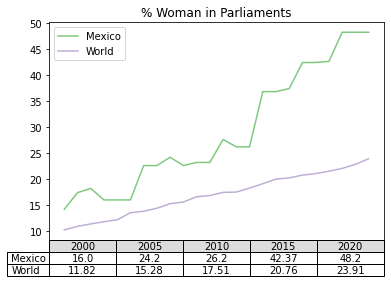

In [9]:
mex_world.plot(title='% Woman in Parliaments',xticks=[])
plt.table(cellText=table.values.round(2),colLabels=table.columns,rowLabels=table.index,cellLoc='center',colColours=['gainsboro']*5)

5.	Almacena en un dataframe (`metadata`), el contenido del archivo Metadata.csv, que indica a qué región pertenece cada país y combínalo con el dataframe `woman_parl`, usando la columna `Country Code`. Obtén los promedios por región del año 2020. Almacena el resultado en el dataframe `info_region`

In [10]:
metadata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TLG/DS_C3_SC2_T5_Pruebate/Metadata.csv")
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
...,...,...,...,...,...
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia
262,ZWE,Sub-Saharan Africa,Lower middle income,NaN,Zimbabwe


In [11]:
info_region = woman_parl.merge(metadata,on='Country Code')
info_region

,Country Name,Country Code,1997,1998,1999,...,2020,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,NaN,NaN,NaN,...,NaN,Latin America & Caribbean,High income,NaN,Aruba
1,Afghanistan,AFG,NaN,NaN,NaN,...,27.016129,South Asia,Low income,NaN,Afghanistan
2,Angola,AGO,9.545455,15.454545,15.454545,...,30.000000,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,Albania,ALB,NaN,NaN,5.161290,...,29.508197,Europe & Central Asia,Upper middle income,NaN,Albania
...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",YEM,NaN,0.664452,0.664452,...,0.332226,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,South Africa,ZAF,25.000000,28.750000,30.000000,...,46.750000,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,Zambia,ZMB,9.677419,10.256410,10.126582,...,16.766467,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia
262,Zimbabwe,ZWE,14.666667,14.666667,14.000000,...,31.851852,Sub-Saharan Africa,Lower middle income,NaN,Zimbabwe


In [12]:
info_region = info_region[['Region','2020']].groupby(['Region']).mean()
info_region

,2020
Region,
East Asia & Pacific,16.531978
Europe & Central Asia,29.814495
Latin America & Caribbean,28.145326
Middle East & North Africa,17.234940
North America,28.229436
South Asia,17.509109
Sub-Saharan Africa,22.672044


6.	Crea un gráfico de barras del dataframe anterior con Seaborn. Incluye los valores del promedio obtenidos como se muestra en la figura.

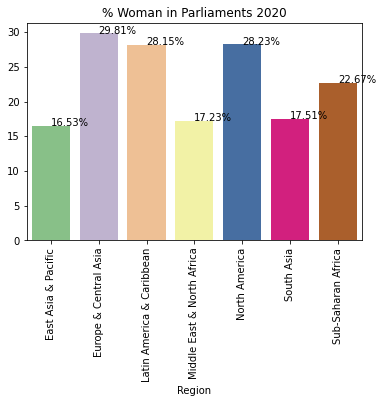

In [13]:
sns.barplot(x=info_region.index,y='2020',data=info_region)
plt.title('% Woman in Parliaments 2020')
plt.ylabel('')
plt.xticks(rotation=90)
for i in range(info_region.shape[0]):
  plt.text(i,info_region.iloc[i,0],str(f'{info_region.iloc[i,0]:.2f}')+'%')

7.	Grafica con Matplotlib la información de `woman_parl` 2020 en un boxplot y ubica a México según el valor de su índice.

Text(1.1, 53.2, 'MEX')

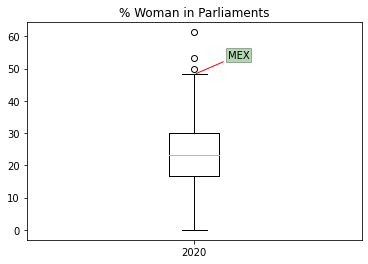

In [14]:
plt.boxplot(woman_parl['2020'].dropna(),labels=['2020'])
plt.title('% Woman in Parliaments')
mex_value = woman_parl.loc[woman_parl['Country Code']=='MEX','2020'].to_list()[0]          
plt.annotate('MEX',xy=(1,mex_value),xytext=(1.1,mex_value+5),arrowprops=dict(arrowstyle='-',color='red'),bbox=dict(facecolor='green',alpha=0.3,pad=2))